# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [988]:
import os
import glob
import pandas as pd
import datetime as dt

#### To-Do - Use glob to match the pattern "csv"

In [989]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [990]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
#Export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

PermissionError: [Errno 13] Permission denied: 'combined_csv.csv'

#### To-Do -Read the CSV file using `pd.read_csv` method

In [ ]:
df = pd.read_csv('combined_csv.csv')


## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2022-07-16 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2022-07-16 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2022-07-16 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2022-07-16 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2022-07-16 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [ ]:
df.shape

(6000, 21)

#### To-Do - Generate the names of the columns using the columns attribute.

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
count,6000.00000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000,6000.00000,6000.000000,6000.0,6000.000000
mean,20041.96680,5.510000,5536.57284,116268.029640,110731.456800,4.761905,5536.57284,6.972700,15.25600,1.993000,2019.0,14.910000
std,9534.09052,2.922212,4213.42019,88481.823998,84268.403808,0.000000,4213.42019,1.717864,8.68994,0.834905,0.0,3.185528
min,3628.80000,1.000000,183.06000,3844.260000,3661.200000,4.761905,183.06000,4.000000,1.00000,1.000000,2019.0,10.000000
25%,11835.00000,3.000000,2132.95500,44792.055000,42659.100000,4.761905,2132.95500,5.500000,8.00000,1.000000,2019.0,12.000000
50%,19882.80000,5.000000,4351.68000,91385.280000,87033.600000,4.761905,4351.68000,7.000000,15.00000,2.000000,2019.0,15.000000
75%,28056.60000,8.000000,8080.29000,169686.090000,161605.800000,4.761905,8080.29000,8.500000,23.00000,3.000000,2019.0,18.000000
max,35985.60000,10.000000,17874.00000,375354.000000,357480.000000,4.761905,17874.00000,10.000000,31.00000,3.000000,2019.0,20.000000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               6000 non-null   object        
 1   Branch                   6000 non-null   object        
 2   City                     6000 non-null   object        
 3   Customer type            6000 non-null   object        
 4   Gender                   6000 non-null   object        
 5   Product line             6000 non-null   object        
 6   Unit price               6000 non-null   float64       
 7   Quantity                 6000 non-null   int64         
 8   Tax 5%                   6000 non-null   float64       
 9   Total                    6000 non-null   float64       
 10  Date                     6000 non-null   datetime64[ns]
 11  Time                     6000 non-null   datetime64[ns]
 12  Payment                  6000 non-

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

#### To-Do - Repeat the two steps above to the `time` column

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].dtype

dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [ ]:
df['Day'] = df['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [ ]:
df['Month'] = df['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [ ]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: int64

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [ ]:
df['Hour'] = df['Time'].dt.hour
df['Hour'].head()

0    13
1    18
2    17
3    16
4    15
Name: Hour, dtype: int64

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [ ]:
df['Hour'].nunique()


11

In [ ]:
df['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [ ]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [ ]:
#Example - Uncomment the Code and Run it
df['Invoice ID'].unique().tolist()

df['City'].unique().tolist()
df['Customer type'].unique().tolist()
df['Gender'].unique().tolist()
df['Product line'].unique().tolist()
df['Payment'].unique().tolist()


['Card', 'Epay', 'Cash']

In [ ]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [ ]:
print("Total Number of unique values in the invoice id Column : {}". format(len(df['Invoice ID'].unique().tolist())))
print("Total Number of unique values in the city Column : {}". format(len(df['City'].unique().tolist())))
print("Total Number of unique values in the Customer Column : {}". format(len(df['Customer type'].unique().tolist())))
print("Total Number of unique values in the Gender Column : {}". format(len(df['Gender'].unique().tolist())))
print("Total Number of unique values in the Product line Column : {}". format(len(df['Product line'].unique().tolist())))
print("Total Number of unique values in the Payment Column : {}". format(len(df['Payment'].unique().tolist())))

Total Number of unique values in the invoice id Column : 1000
Total Number of unique values in the city Column : 3
Total Number of unique values in the Customer Column : 2
Total Number of unique values in the Gender Column : 2
Total Number of unique values in the Product line Column : 6
Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [ ]:
#Example
df['Invoice ID'].value_counts()
df['City'].value_counts()
df['Customer type'].value_counts()
df['Gender'].value_counts()
df['Product line'].value_counts()
df['Payment'].value_counts()


Epay    2070
Cash    2064
Card    1866
Name: Payment, dtype: int64

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [ ]:
Cities = df.groupby(['City'])
Cities.sum()
Cities.mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [ ]:
Cities.get_group('Abuja')['gross income'].sum()


10923189.12

In [ ]:
Cities.get_group('Lagos')['gross income'].sum()


10923466.68

In [ ]:
Cities.get_group('Port Harcourt')['gross income'].sum()

11372781.24

In [ ]:
Cities.get_group('Port Harcourt')['gross income'].sum()

11372781.24

In [ ]:
Cities.get_group('Port Harcourt')['Unit price'].sum()
Cities.get_group('Port Harcourt')['Quantity'].sum()
Cities.get_group('Abuja')['Unit price'].sum()
Cities.get_group('Abuja')['Quantity'].sum()
Cities.get_group('Lagos')['Unit price'].sum()
Cities.get_group('Lagos')['Quantity'].sum()

11154

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

<AxesSubplot:xlabel='Branch', ylabel='count'>

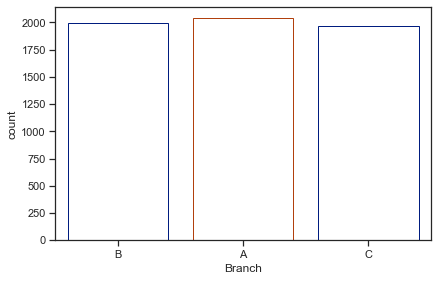

In [1000]:
sns.countplot(df["Branch"], facecolor=(0, 0.0, 0, 0),linewidth=1,edgecolor=sns.color_palette("dark", 2))


<AxesSubplot:xlabel='Payment', ylabel='count'>

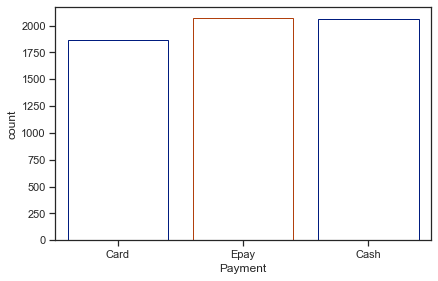

In [1010]:
sns.countplot(df["Payment"], facecolor=(0, 0.0, 0, 0),linewidth=1,edgecolor=sns.color_palette("dark", 2))

#### Explore a countplot for the `Payment` and `City` Column

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

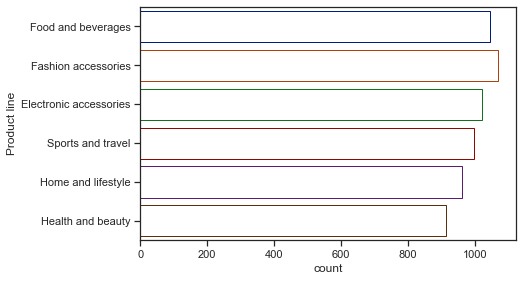

In [1011]:
data = df['Product line']
ax = sns.countplot(y=df["Product line"], data=data, facecolor=(0, 0.0, 0, 0),linewidth=1, edgecolor=sns.color_palette("dark", 6))

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

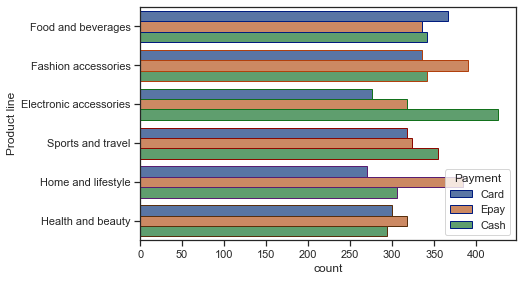

In [1012]:
data = df['Product line']
ax = sns.countplot(y=df["Product line"], data=data, hue = df["Payment"],linewidth=1, edgecolor=sns.color_palette("dark", 6))

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

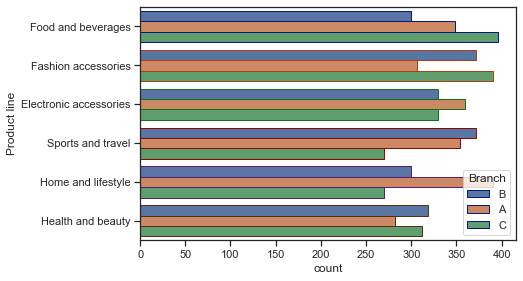

In [1021]:
data = df['Product line']
ax = sns.countplot(y=df["Product line"], data=data, hue = df["Branch"],linewidth=1, edgecolor=sns.color_palette("dark", 6))

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

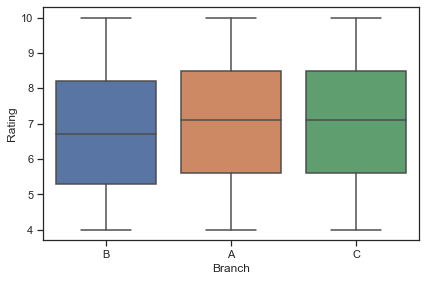

In [1022]:
data = df['Rating']
sns.boxplot(x= df['Branch'], y = df['Rating'], data = data)

# Answer: 
* From the above, branches A and C seems to have the highest ratings. That's Lagos and Port Harcourt

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

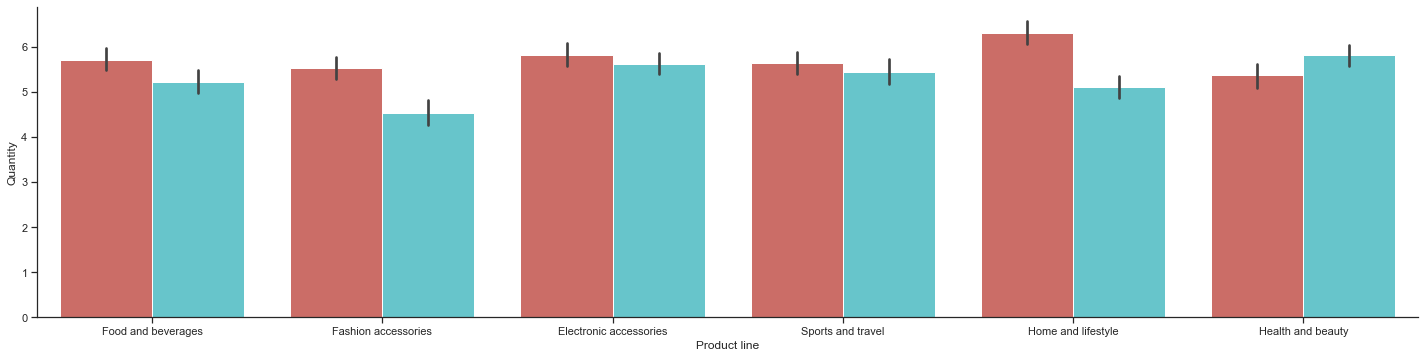

In [1028]:

data = df
sns.catplot(data=data,x = df["Product line"], y= df['Quantity'], hue='Gender', kind = 'bar', aspect=4, palette = 'hls')

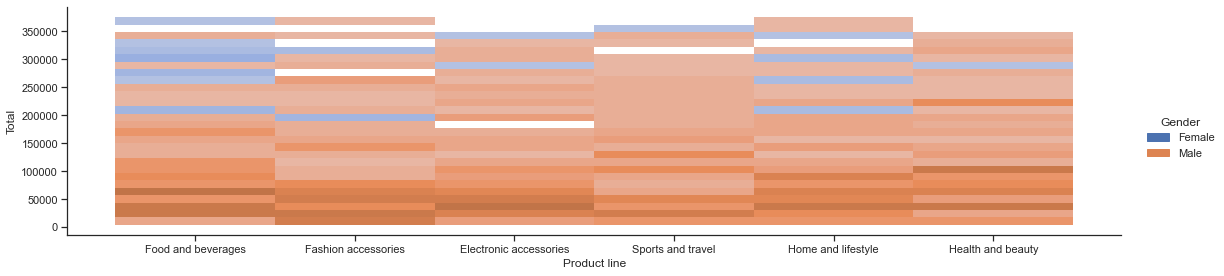

In [ ]:
# Note that I chose the displot over the catplot here cos I kept getting errors and I feel the displot would give a better representation.

data = df
sns.displot(data=data,x = df["Product line"], y= df['Total'], hue='Gender', kind='hist', height=4, aspect=4)

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

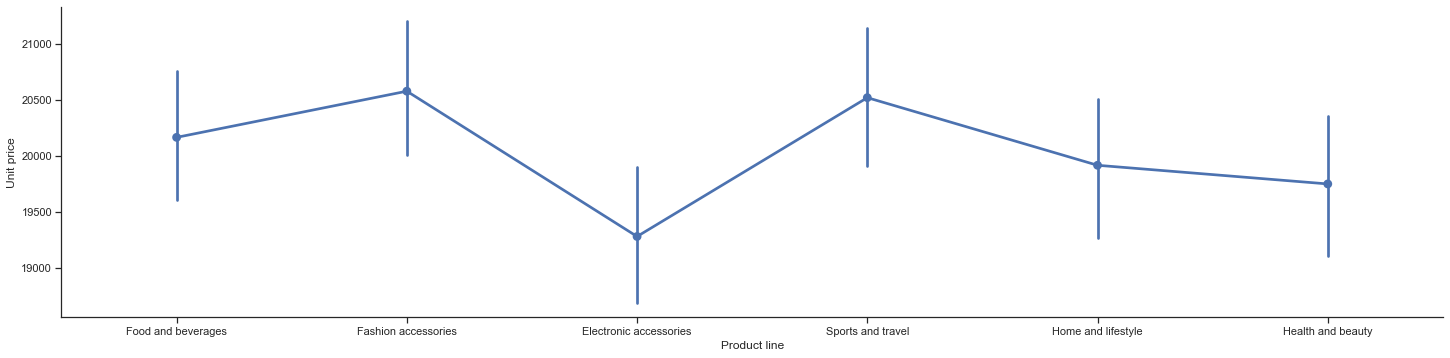

In [ ]:
data = df
sns.catplot(x = df['Product line'], y = df['Unit price'], data = data, kind = 'point', aspect = 4)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

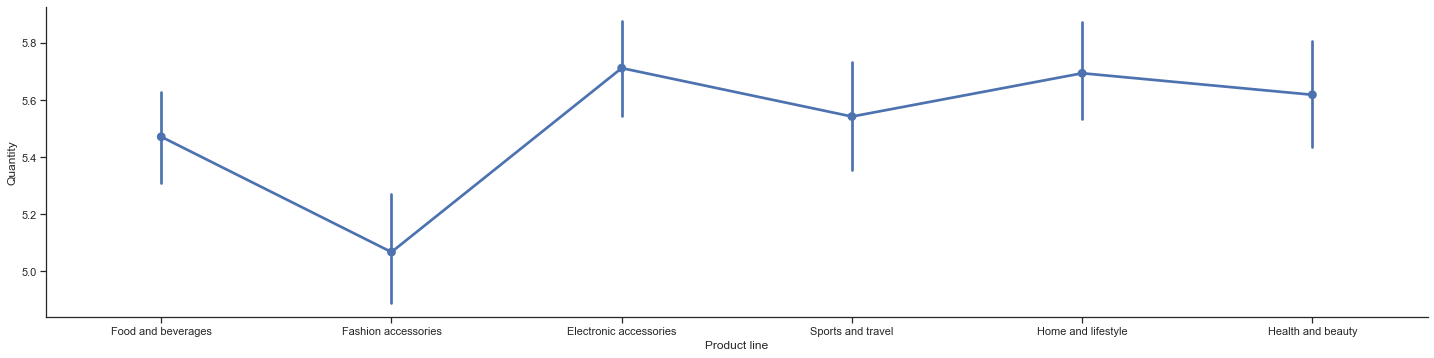

In [ ]:
data = df
sns.catplot(x = df['Product line'], y = df['Quantity'], data = data, kind = 'point', aspect = 4)

## From the foregoing charts,
* One can conclude that on the average items with lower prices are sold more while those with higher prices are sold less. this is the case with Electronic accessories, which has the lowest cost per unit but have the highest quantity sold. The opposite can be said of Fashion accessories which has the highest cost per unit and one of the lowest quantity sold.

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


<AxesSubplot:>

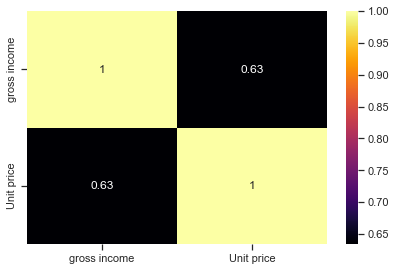

In [ ]:
data = df[['gross income', 'Unit price']]
sns.heatmap(data.corr(), annot = True, cmap = 'inferno')

## from the above,
- I have examined the correlation between the unit price and the gross income or gain on each of the transaction. As expected, there is a direct positive relationship between the Unit price and the profit or Gross income. Put simply, with every #1 increase in price, there would be a corresponding #0.63 increase in Gross income

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 